### Supplemetal notebook for the medium post

#### Getting started with PySpark: to check if you have spark available use the below code. Using findspark package to do this.

In [1]:
import findspark
findspark.init()

import pyspark
import random

sc = pyspark.SparkContext(appName="Pi")
num_samples = 100000000

def inside(p):     
  x, y = random.random(), random.random()
  return x*x + y*y < 1

count = sc.parallelize(range(0, num_samples)).filter(inside).count()

pi = 4 * count / num_samples
print(pi)

sc.stop()

3.14154088


#### Configuring a SparkSession
- The entry point to using Spark SQL is an object called SparkSession. It initiates a Spark Application which all the code for that Session will run on.
- NOTE: the “ \” character is this context is called a continuation character which is just a helpful wrapping tool for making long lines of code more readable.

In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder \
    .master("local[*]") \
    .appName("Learning_Spark") \
    .getOrCreate()

- .builder — gives access to Builder API which is used to configure the session .
- .master() — determines where the program will run; "local[*]" sets it to run locally on all cores but you can use "local[1]" to run on one core for example. In this case, our programs will be run on Google’s servers.
- .appName() — optional method to name the Spark Application
- .getOrCreate() — gets an existing SparkSession or creates new one if none exists

In [3]:
data = spark.read.csv('bottle.csv',inferSchema=True, header=True)

NOTE: This function is specifically for reading CSV files into a DataFrame in PySparkSQL. It won’t work for loading data into an RDD and different languages (besides Python) have different syntax. Exercise caution when searching online for help because many resources do not assume Spark SQL or Python.


#### Data Exploration
The first thing we can do is check the shape of of our DataFrame. Unlike Pandas, there is no dedicated method for this but we can use the .count() and .columns() to retrieve the information ourselves

In [4]:
data.count(), len(data.columns)

(864863, 74)

In [5]:
data.show(5) #.head() works only in pandas
#Calling .show() with no parameters will return the first 20 records.

+-------+-------+-----------+--------------------+------+------+------+------+------+-----+-----------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+-----+----+------+------+-----+----+-----+----+-----+----+------+------+------+------+------+------+------+------+------+------+------+------+------+------+-------+------+--------+----------+-------+-----+-------+----+-------+------+-----+-----+-----+-----+------+-------+------+------+----+----+----+----+----+----+-------------------+
|Cst_Cnt|Btl_Cnt|     Sta_ID|            Depth_ID|Depthm|T_degC|Salnty|O2ml_L|STheta|O2Sat|Oxy_µmol/Kg|BtlNum|RecInd|T_prec|T_qual|S_prec|S_qual|P_qual|O_qual|SThtaq|O2Satq|ChlorA|Chlqua|Phaeop|Phaqua|PO4uM|PO4q|SiO3uM|SiO3qu|NO2uM|NO2q|NO3uM|NO3q|NH3uM|NH3q|C14As1|C14A1p|C14A1q|C14As2|C14A2p|C14A2q|DarkAs|DarkAp|DarkAq|MeanAs|MeanAp|MeanAq|IncTim|LightP|R_Depth|R_TEMP|R_POTEMP|R_SALINITY|R_SIGMA|R_SVA|R_DYNHT|R_O2|R_O2Sat|R_SIO3|R_PO4|R_NO3|R_NO2|R_NH4|R_CH

That is a lot of columns. Let's see the columns

In [6]:
data.printSchema() # or similar to data.dtypes in pandas

root
 |-- Cst_Cnt: integer (nullable = true)
 |-- Btl_Cnt: integer (nullable = true)
 |-- Sta_ID: string (nullable = true)
 |-- Depth_ID: string (nullable = true)
 |-- Depthm: integer (nullable = true)
 |-- T_degC: double (nullable = true)
 |-- Salnty: double (nullable = true)
 |-- O2ml_L: double (nullable = true)
 |-- STheta: double (nullable = true)
 |-- O2Sat: double (nullable = true)
 |-- Oxy_µmol/Kg: double (nullable = true)
 |-- BtlNum: integer (nullable = true)
 |-- RecInd: integer (nullable = true)
 |-- T_prec: integer (nullable = true)
 |-- T_qual: integer (nullable = true)
 |-- S_prec: integer (nullable = true)
 |-- S_qual: integer (nullable = true)
 |-- P_qual: integer (nullable = true)
 |-- O_qual: integer (nullable = true)
 |-- SThtaq: integer (nullable = true)
 |-- O2Satq: integer (nullable = true)
 |-- ChlorA: double (nullable = true)
 |-- Chlqua: integer (nullable = true)
 |-- Phaeop: double (nullable = true)
 |-- Phaqua: integer (nullable = true)
 |-- PO4uM: double (nu

In [7]:
#selectively choose the data
data.select("Salnty","T_degC") \
.show(15, truncate=False)
#Included is the truncate=False parameter that adjusts the size of columns to prevent values from being cut off.

+------+------+
|Salnty|T_degC|
+------+------+
|33.44 |10.5  |
|33.44 |10.46 |
|33.437|10.46 |
|33.42 |10.45 |
|33.421|10.45 |
|33.431|10.45 |
|33.44 |10.45 |
|33.424|10.24 |
|33.42 |10.06 |
|33.494|9.86  |
|33.51 |9.83  |
|33.58 |9.67  |
|33.64 |9.5   |
|33.689|9.32  |
|33.847|8.76  |
+------+------+
only showing top 15 rows



In [4]:
#using filter for the data
condition1 = (data.Salnty.isNotNull()) & (data.T_degC.isNotNull())
data = data.filter(condition1)

In [9]:
# Summary statistics 
data.describe(["Salnty","T_degC"]).show()

+-------+------------------+------------------+
|summary|            Salnty|            T_degC|
+-------+------------------+------------------+
|  count|            814247|            814247|
|   mean| 33.84133706283256|10.860287286290284|
| stddev|0.4616358578597982| 4.224930001277073|
|    min|            28.431|              1.44|
|    max|            37.034|             31.14|
+-------+------------------+------------------+



In [5]:
# converting spark dataframe to pandas dataframe
data_df = data.toPandas()

In [11]:
data_df.corr()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
Cst_Cnt,1.000000,0.999302,-0.148351,0.070924,-0.201875,0.147750,-0.089902,0.136510,0.147493,-0.026567,...,0.040772,0.012164,-0.148016,-0.605014,-0.036155,-9.793799e-02,-0.075060,-1.152121e-01,-0.262587,0.020778
Btl_Cnt,0.999302,1.000000,-0.147733,0.071766,-0.199039,0.145752,-0.089521,0.134732,0.145498,-0.027338,...,0.041998,0.012674,-0.147390,-0.595215,-0.035516,-9.725130e-02,-0.074255,-1.141653e-01,-0.259082,0.020315
Depthm,-0.148351,-0.147733,1.000000,-0.676504,0.572867,-0.589131,0.582710,-0.595547,-0.589175,-0.681980,...,-0.280995,-0.202396,0.999994,-0.018418,0.567855,5.723744e-01,0.786873,8.661849e-01,0.223304,-0.611798
T_degC,0.070924,0.071766,-0.676504,1.000000,-0.505266,0.795049,-0.829155,0.850596,0.795543,0.750481,...,0.102977,0.001544,-0.675116,0.006210,-0.936239,-9.499725e-01,-0.742196,-8.896354e-01,0.547436,0.743735
Salnty,-0.201875,-0.199039,0.572867,-0.505266,1.000000,-0.824413,0.603470,-0.790231,-0.824338,-0.693341,...,-0.031125,-0.004848,0.571640,-0.000758,0.938153,9.559417e-01,0.895124,9.371469e-01,0.583807,0.106417
O2ml_L,0.147750,0.145752,-0.589131,0.795049,-0.824413,1.000000,-0.889568,0.993217,0.999999,0.744971,...,0.273431,0.155382,-0.587275,0.053959,-0.977188,-9.412140e-01,-0.802493,-7.264598e-01,0.174204,0.663591
STheta,-0.089902,-0.089521,0.582710,-0.829155,0.603470,-0.889568,1.000000,-0.876899,-0.890043,-0.378342,...,-0.084765,0.008732,0.581409,-0.005269,0.964594,9.655464e-01,0.779899,8.877780e-01,-0.480397,-0.717815
O2Sat,0.136510,0.134732,-0.595547,0.850596,-0.790231,0.993217,-0.876899,1.000000,0.993343,0.755972,...,0.250458,0.126179,-0.593737,0.048253,-0.985445,-9.629766e-01,-0.788291,-7.677661e-01,0.732628,0.913807
Oxy_µmol/Kg,0.147493,0.145498,-0.589175,0.795543,-0.824338,0.999999,-0.890043,0.993343,1.000000,0.745210,...,0.272914,0.154766,-0.587319,0.052953,-0.977329,-9.415277e-01,-0.802435,-7.270233e-01,0.180058,0.666715
BtlNum,-0.026567,-0.027338,-0.681980,0.750481,-0.693341,0.744971,-0.378342,0.755972,0.745210,1.000000,...,-0.007774,-0.055557,-0.681181,0.080122,-0.888061,-9.585493e-01,-0.737828,-8.289052e-01,-0.457365,0.333808


In [13]:
import seaborn as sns

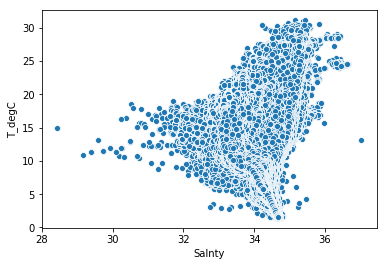

In [11]:
# This produces a scatter 
sns.scatterplot(x="Salnty", y="T_degC", data=data_df)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


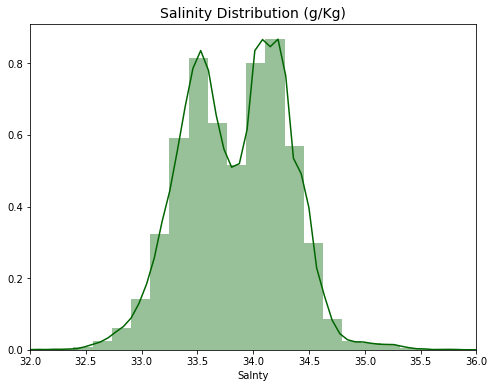

In [15]:
#  Salinity distribution
plt.figure(figsize=(8,6))
plt.xlim([32, 36])#  Salinity distribution
plt.title('Salinity Distribution (g/Kg)', fontsize=14)
sns.distplot(data_df['Salnty'], color='darkgreen')

Min MSE: 3881.5477650803173
Coeff: 0.3200000000000012


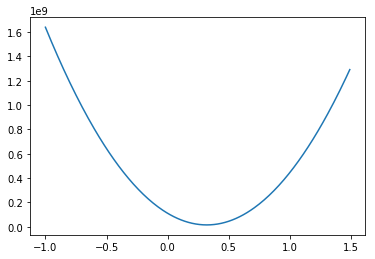

In [20]:
import numpy as np
temp = data_df.T_degC

mses = []
sal_coef = np.arange(-1,1.5,0.01)
for coef in sal_coef:
    pred_values = np.array([coef * lstat for lstat in data_df.Salnty.values])
    mses.append(np.sum((temp - pred_values)**2))
    
plt.plot(sal_coef, mses)
print("Min MSE: {}".format(np.sqrt(np.min(mses))))
print("Coeff: {}".format(lstat_coef[np.argmin(mses)]))

In [21]:
beta_0 = 0
beta_1 = 0
learning_rate = 0.001
sal_values = data_df.Salnty.values
n = len (sal_values)
all_mse = []
for _ in range(10000):
    predicted = beta_0 + beta_1 * sal_values
    residuals = temp - predicted
    all_mse.append(np.sum(residuals**2))
    beta_0 = beta_0 - learning_rate * ((2/n) * np.sum(residuals) * -1)
    beta_1 = beta_1 - learning_rate * ((2/n) * residuals.dot(sal_values) * -1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


### Using SKlearn

In [6]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [7]:
target = data_df.T_degC
data_df= data_df[['Salnty']]
scaler = StandardScaler()
scaler.fit(data_df)
scaled_df = scaler.transform(data_df)

In [19]:
linear_regression_model = SGDRegressor(tol=.0001, eta0=.01)
linear_regression_model.fit(scaled_df, target)
predictions = linear_regression_model.predict(scaled_df)
mse = mean_squared_error(target, predictions)
print("RMSE: {}".format(np.sqrt(mse)))

RMSE: 3.6460813120745557


In [20]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(2, include_bias=False)
poly_df = poly.fit_transform(data_df)
scaled_poly_df = scaler.fit_transform(poly_df)
print(scaled_poly_df.shape)

In [35]:
linear_regression_model = SGDRegressor(tol=.0001, eta0=.001)
linear_regression_model.fit(scaled_poly_df, target)
predictions = linear_regression_model.predict(scaled_poly_df)
mse = mean_squared_error(target, predictions)
print("RMSE: {}".format(np.sqrt(mse)))

RMSE: 3.6420444504755323


In [41]:
linear_regression_model.fit(scaled_df, target)
sorted(list(zip(data_df.columns, linear_regression_model.coef_)), key=lambda coeff: abs(coeff[1]), reverse=True)

[('Salnty', -2.0963493137397)]

In [21]:
from sklearn.utils import resample
n_bootstraps = 1000
bootstrap_X = []
bootstrap_y = []
for _ in range(n_bootstraps):
    sample_X, sample_y = resample(scaled_df, target)
    bootstrap_X.append(sample_X)
    bootstrap_y.append(sample_y)

In [22]:
linear_regression_model = SGDRegressor(tol=.0001, eta0=.01)
coeffs = []
for i, data in enumerate(bootstrap_X):
    linear_regression_model.fit(data, bootstrap_y[i])
    coeffs.append(linear_regression_model.coef_)

(array([1]), <a list of 1 Text xticklabel objects>)

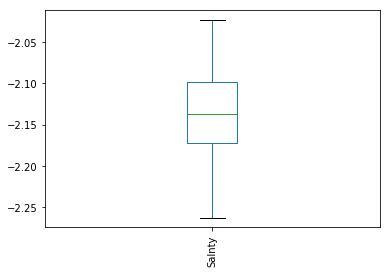

In [23]:
coef_df = pd.DataFrame(coeffs, columns=data_df.columns)
coef_df.plot(kind='box')
plt.xticks(rotation=90)

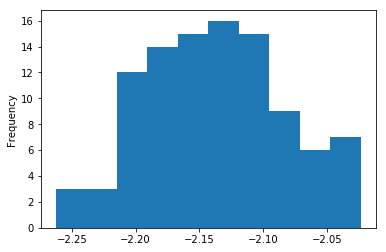

In [24]:
coef_df['Salnty'].plot(kind='hist')

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_df, target, test_size=0.33, random_state=42)

In [26]:
linear_regression_model = SGDRegressor(tol=.0001, eta0=.01)
linear_regression_model.fit(X_train, y_train)
train_predictions = linear_regression_model.predict(X_train)
test_predictions = linear_regression_model.predict(X_test)

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print("Train MSE: {}".format(train_mse))
print("Test MSE: {}".format(test_mse))

Train MSE: 13.272614032966784
Test MSE: 13.34405303324367


In [31]:
## source: http://scikit-learn.org/0.15/auto_examples/plot_learning_curve.html
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=make_scorer(mean_squared_error))
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

active pyforest.LazyImport of <module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

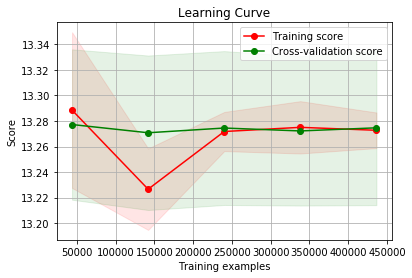

In [32]:
plot_learning_curve(linear_regression_model, "Learning Curve", X_train, y_train, cv=5)

In [33]:
X_train.shape

(545545, 1)

In [9]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {"eta0": [ .001, .003, .01, .03, .1, .3, 1, 3],
             "tol": [0.01, 0.001, 0.0001]}

linear_regression_model = SGDRegressor()

n_iter_search = 8
random_search = RandomizedSearchCV(linear_regression_model, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=3, scoring='neg_mean_squared_error')
random_search.fit(X_train, y_train)

print("Best Parameters: {}".format(random_search.best_params_))
print("Best Negative MSE: {}".format(random_search.best_score_))

Best Parameters: {'tol': 0.01, 'eta0': 0.001}
Best Negative MSE: -13.269166959158564


In [10]:
from sklearn.linear_model import ElasticNetCV

# l1 ratio of zero is l2 and visa-versa 
# alphas are how much to weight regularization
clf = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], alphas=[.1, 1, 10])
clf.fit(X_train, y_train)
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)
print("Train MSE: {}".format(mean_squared_error(y_train, train_predictions)))
print("Test MSE: {}".format(mean_squared_error(y_test, test_predictions)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Train MSE: 13.278895424806798
Test MSE: 13.349237530628455
